# Neural Network
scikit-learn の neural_network MLPClassifier による手書き文字の認識

### 利用するライブラリ
* numpy：数値計算
* pandas：統計解析
* matplotlib.pyplot：グラフ表示
* seaborn：グラフ表示

* scikit-learn：機械学習ライブラリー
  * sklearn.neural_network import MLPClassifier：判別アルゴリズム ニューラルネットワーク
  * sklearn.model_selection import train_test_split：学習用データとテストデータの分離
  * sklearn.metrics import accuracy_score, confusion_matrix, classification_report：モデルの評価を行うモジュール
  * sklearn.datasets import fetch_openml：機械学習サンプルデータ読み込み

* pillow（PIL）：画像処理
* requests, io：画像データの読み込み

### 利用するデータ
* digits（scikit-learn の datasets に含まれます）
  * MNIST（http://yann.lecun.com/exdb/mnist/ ）のスモール版  
  * データは 0～9の 数字がそれぞれ180個前後、計1797個
  * 個々の画像は、サイズ 8×8、明暗 0〜16 のデータ
* 判別確認用のサンプル画像
  * https://github.com/koichi-inoue/DataScience/blob/main/digit2.png
  * https://github.com/koichi-inoue/DataScience/blob/main/digit7.png

## ライブラリとデータの読み込み

In [1]:
# 標準的なライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 機械学習 scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml

# 画像の読み込みと表示確認に利用するライブラリ
import requests
import io
from PIL import Image

# MNISTデータセットの読み込み
mnist = fetch_openml('mnist_784', version=1, parser="auto")
X, y = mnist.data / 255., mnist.target.astype(int)

##データの確認
MNIST（エムニスト）データ：手書き文字認識用のデータ  
28px x 28px の画像 70,000枚  


In [2]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (70000, 784)
y.shape: (70000,)


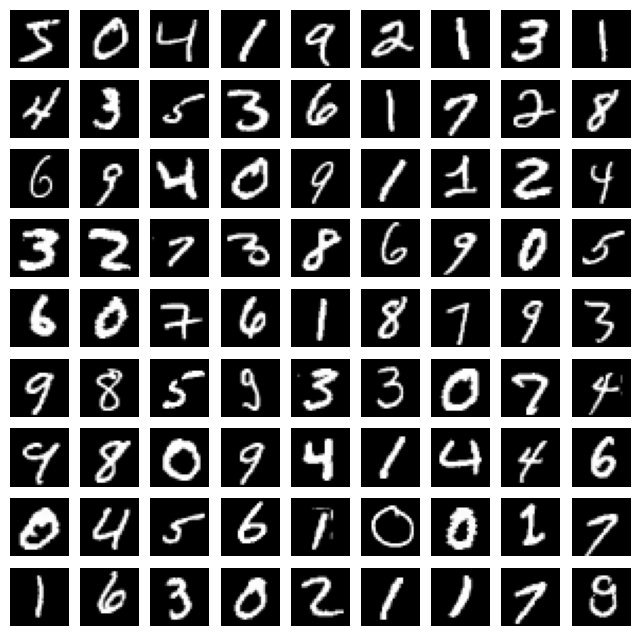

In [3]:
# 先頭81個の画像データを9x9に並べて表示
fig, axes = plt.subplots(9, 9, figsize=(8, 8))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X.iloc[i].to_numpy().reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()

## データを訓練用とテスト用に分割

In [4]:
# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 学習
### MLPClassifier を使用  
hidden_layer_sizes：層の数と、ニューロンの数を設定  
activation：活性化関数を選択（デフォルト 'relu'）  
solver：最適化手法を選択（デフォルト 'adam'）  
max_iter：学習の反復の最大回数を設定（デフォルト 200）  
tol：学習の収束値を設定（デフォルト：0.0001）  
warm_start：学習済みの重みを使うか設定（デフォルト FALSE）  
verbose：学習の進捗状況の表示の有無（デフォルト：FALSE）

In [5]:
# ニューラルネットワークのモデルを作成して訓練
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=50, tol=0.001, warm_start=True, verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 0.43416033
Iteration 2, loss = 0.20231244
Iteration 3, loss = 0.15024923
Iteration 4, loss = 0.12038623
Iteration 5, loss = 0.10046038
Iteration 6, loss = 0.08574172
Iteration 7, loss = 0.07419120
Iteration 8, loss = 0.06528221
Iteration 9, loss = 0.05738068
Iteration 10, loss = 0.05054527
Iteration 11, loss = 0.04458284
Iteration 12, loss = 0.03977488
Iteration 13, loss = 0.03552684
Iteration 14, loss = 0.03181022
Iteration 15, loss = 0.02862333
Iteration 16, loss = 0.02492545
Iteration 17, loss = 0.02229158
Iteration 18, loss = 0.02010039
Iteration 19, loss = 0.01784178
Iteration 20, loss = 0.01565637
Iteration 21, loss = 0.01390736
Iteration 22, loss = 0.01244192
Iteration 23, loss = 0.01138896
Iteration 24, loss = 0.00996314
Iteration 25, loss = 0.00929912
Iteration 26, loss = 0.00805628
Iteration 27, loss = 0.00689295
Iteration 28, loss = 0.00656255
Iteration 29, loss = 0.00566749
Iteration 30, loss = 0.00542844
Iteration 31, loss = 0.00465291
Iteration 32, los

MLPClassifier(max_iter=50, tol=0.001, verbose=True, warm_start=True)

## テスト用のデータでモデルの評価


In [6]:
#テスト用データ X_test を用いて予測
y_pred = model.predict(X_test)

# 正確さ（Accuracy）の確認
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.72%


## 混同行列で状況を確認
テストデータにおける予測状況を 混同行列（Confusion Matrix）で確認します。  
混同行列「正解クラス」を縦軸、「予測クラス」を横軸として出力されています。    
対角線上のセルは、正しく分類された観測値に対応します。  
対角線外のセルは、誤分類された観測値に対応します。


In [7]:
# 混同行列を出力
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat


array([[1319,    1,    4,    0,    1,    3,    6,    3,    6,    0],
       [   0, 1586,    1,    2,    2,    0,    1,    5,    2,    1],
       [   0,    4, 1343,    7,    5,    1,    3,    8,    6,    3],
       [   3,    1,   11, 1392,    0,    9,    0,    5,    5,    7],
       [   1,    0,    2,    0, 1262,    2,    5,    4,    3,   16],
       [   0,    1,    1,   12,    2, 1242,    8,    0,    6,    1],
       [   1,    0,    0,    0,    3,    4, 1386,    0,    2,    0],
       [   2,    1,   10,    2,    3,    3,    0, 1466,    2,   14],
       [   3,    7,    8,    9,    4,    5,    6,    3, 1304,    8],
       [   5,    1,    1,    7,    8,    2,    0,    8,    7, 1381]])

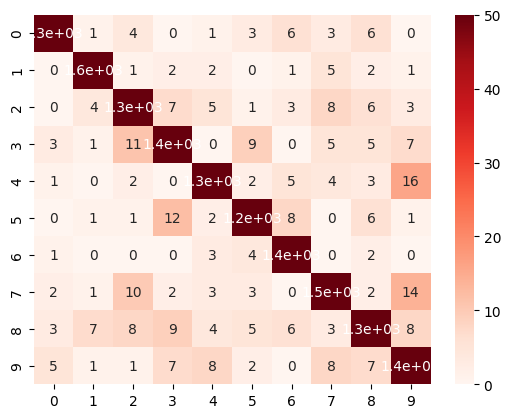

In [8]:
# Seaborn のヒートマップを使って可視化
sns.heatmap(conf_mat, annot=True, vmax=50, cmap="Reds")
plt.show()

対角線部分を除く、色の濃い部分が「予測が間違ったケース」です。

## 自作画像で検証

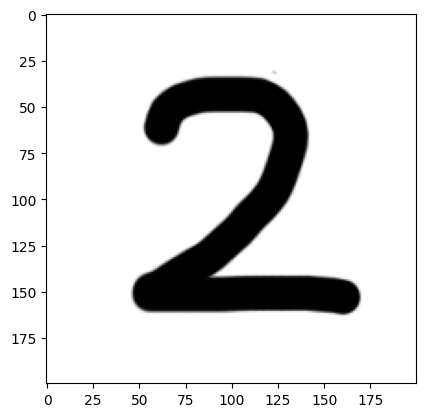

In [9]:
# サンプル画像の読み込み
url = requests.get('https://raw.githubusercontent.com/koichi-inoue/DataScience/main/digit2.png')

# 画像を読み込んで 8bit(256階調) gray に変換
my_image = Image.open(io.BytesIO(url.content)).convert('L')
plt.imshow(my_image, cmap=plt.cm.gray)
plt.show()

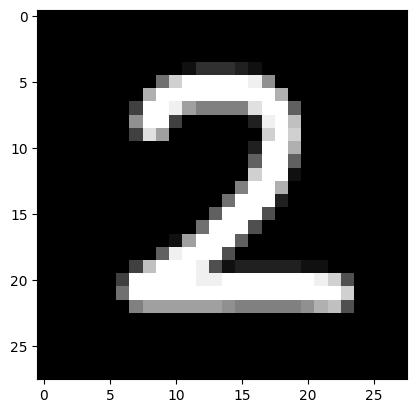

In [21]:
# ここで利用している MNISTの画像 28×28に合わせてリサイズ
my_image = my_image.resize((28, 28), Image.LANCZOS)
# ndarray型に変換
my_image_array = np.array( my_image, dtype=float )
# レベルを 0-16にするとともに階調を反転
my_image_array = 16 - np.floor(17 * my_image_array / 256)

# 画像出力（digits形式に変換後）
plt.imshow(my_image_array, cmap=plt.cm.gray, interpolation='none')
plt.show()

## 予測

In [22]:
# データを１次元に変換
my_image_array = my_image_array.reshape(-1,784)

# 画像データを、本件のデータ形式にあわせてデータフレーム化
df_my_image = pd.DataFrame(data=my_image_array, columns=X.columns.values)

# 予測判定
res = model.predict(df_my_image)
res[0]

2

正しく２と判定されました